## Logistic regression for muti-class classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
X,y = make_classification(n_samples=1000, n_features=15, n_informative=3, n_classes=3)
X, y

(array([[-1.43392715,  1.06550414,  1.15027532, ..., -0.81427733,
          1.31995193,  0.146574  ],
        [ 0.70766343, -0.39412294, -0.4599513 , ...,  0.35053172,
         -1.06089494, -0.49752082],
        [ 0.01768331, -0.18407755, -0.14817548, ..., -0.5526844 ,
          1.05976136, -0.83744106],
        ...,
        [ 0.23858817,  0.08162453, -0.192335  , ...,  0.46180237,
          0.22299373,  0.68814366],
        [ 2.02155347,  0.53879999,  2.19565931, ...,  1.07439343,
          0.76921682,  1.02225063],
        [-0.19163588,  1.56674842, -0.50182666, ..., -1.12851476,
         -3.36604972,  1.42154427]]),
 array([1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2,
        1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 1, 1, 1,
        0, 2, 2, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 2, 2,
        2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2,
        1, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 2, 1, 1,
   

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
lor = LogisticRegression(multi_class='ovr')
lor.fit(X_train, y_train)

y_pred = lor.predict(X_test)

print("accuracy_score :", accuracy_score(y_test, y_pred))

print("*"*50)
print("confusion_matrix :\n", confusion_matrix(y_test, y_pred))
print("*"*50)
print("classification_report :\n",classification_report(y_test, y_pred))

accuracy_score : 0.74
**************************************************
confusion_matrix :
 [[59 10 11]
 [ 2 76 14]
 [13 15 50]]
**************************************************
classification_report :
               precision    recall  f1-score   support

           0       0.80      0.74      0.77        80
           1       0.75      0.83      0.79        92
           2       0.67      0.64      0.65        78

    accuracy                           0.74       250
   macro avg       0.74      0.73      0.74       250
weighted avg       0.74      0.74      0.74       250



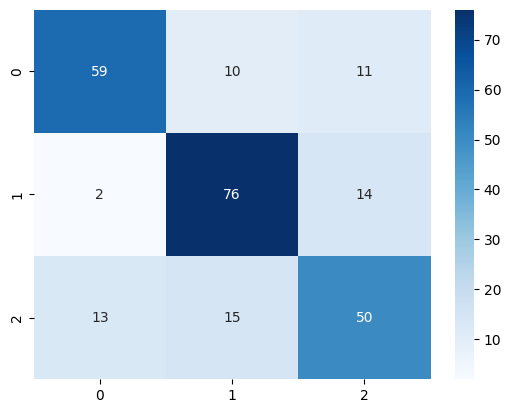

In [5]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show()

## Hyperparameter tuning GridSearchCV

In [6]:
model = LogisticRegression(multi_class='ovr')
# params
penalty = ['l1', 'l2', 'elasticnet']
c_values = [0.001, 0.01, 0.1, 1 ,10, 100]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

In [7]:
params = dict(penalty=penalty, C=c_values, solver=solver)

In [8]:
cv=StratifiedKFold(n_splits=5)

In [9]:
grid = GridSearchCV(estimator=model,param_grid=params, scoring='accuracy', cv=cv, n_jobs=-1, refit=True)
grid.fit(X_train, y_train)
y_pred_grid = grid.predict(X_test)

In [10]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [11]:
grid.best_score_

0.7493333333333334

In [12]:
print("accuracy_score :", accuracy_score(y_test, y_pred_grid))

print("*"*50)
print("confusion_matrix :\n", confusion_matrix(y_test, y_pred_grid))
print("*"*50)
print("classification_report :\n",classification_report(y_test, y_pred_grid))

accuracy_score : 0.76
**************************************************
confusion_matrix :
 [[60 10 10]
 [ 1 80 11]
 [12 16 50]]
**************************************************
classification_report :
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        80
           1       0.75      0.87      0.81        92
           2       0.70      0.64      0.67        78

    accuracy                           0.76       250
   macro avg       0.76      0.75      0.75       250
weighted avg       0.76      0.76      0.76       250



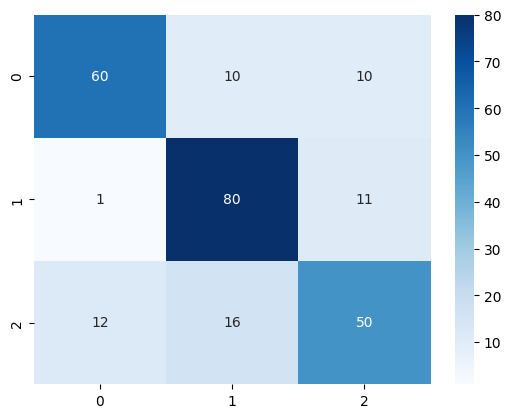

In [13]:
sns.heatmap(confusion_matrix(y_test, y_pred_grid), annot=True, cmap='Blues')
plt.show()

## RandomizedCV Hyperparameter tuning

In [14]:
model = LogisticRegression(multi_class='ovr')
randomCV = RandomizedSearchCV(estimator=model,param_distributions=params,scoring='accuracy', cv=5)
randomCV

RandomizedSearchCV(cv=5, estimator=LogisticRegression(multi_class='ovr'),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [15]:
randomCV.fit(X_train, y_train)
y_pred_randomCV = randomCV.predict(X_test)

In [16]:
randomCV.best_params_, randomCV.best_score_

({'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}, 0.7493333333333334)

In [17]:
print("accuracy_score :", accuracy_score(y_test, y_pred_randomCV))

print("*"*50)
print("confusion_matrix :\n", confusion_matrix(y_test, y_pred_randomCV))
print("*"*50)
print("classification_report :\n",classification_report(y_test, y_pred_randomCV))

accuracy_score : 0.76
**************************************************
confusion_matrix :
 [[60 10 10]
 [ 1 80 11]
 [12 16 50]]
**************************************************
classification_report :
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        80
           1       0.75      0.87      0.81        92
           2       0.70      0.64      0.67        78

    accuracy                           0.76       250
   macro avg       0.76      0.75      0.75       250
weighted avg       0.76      0.76      0.76       250



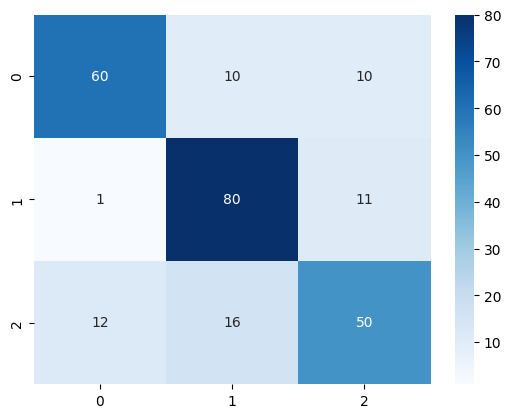

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred_randomCV), annot=True, cmap='Blues')
plt.show()

## Logistic regression for unbalanced dataset

In [19]:
## imbalanced dataset
X,y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,
                   n_redundant=0,weights=[0.99],random_state=10)

X, y

(array([[ 1.87991016, -1.4850347 ],
        [ 0.37708311, -2.23858488],
        [ 1.35431163, -2.66463822],
        ...,
        [ 0.99509904, -0.54192355],
        [ 1.75859359, -1.54961188],
        [ 0.79770543, -1.99467372]]),
 array([0, 0, 0, ..., 0, 0, 0]))

<Axes: xlabel='0', ylabel='1'>

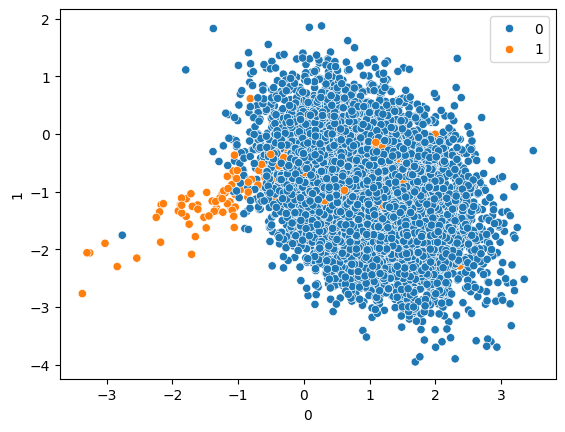

In [20]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
model = LogisticRegression()
# params
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [23]:
params.update({'class_weight':class_weight})
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [24]:
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params,scoring='accuracy', cv=cv, refit=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [25]:
grid.best_params_, grid.best_score_

({'C': 0.1,
  'class_weight': {0: 50, 1: 100},
  'penalty': 'l1',
  'solver': 'liblinear'},
 0.9882666666666667)

accuracy_score : 0.9896
**************************************************
classification_report :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2465
           1       1.00      0.26      0.41        35

    accuracy                           0.99      2500
   macro avg       0.99      0.63      0.70      2500
weighted avg       0.99      0.99      0.99      2500

**************************************************


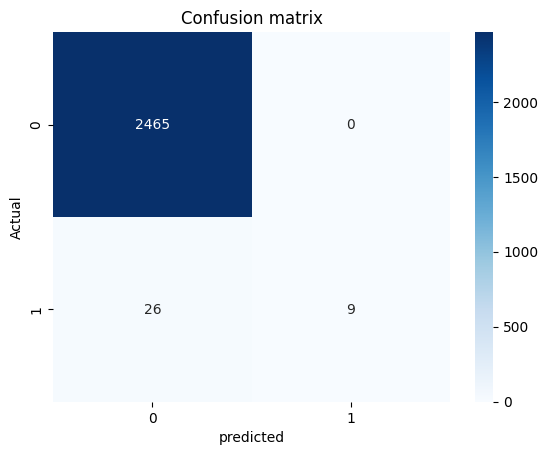

In [26]:
y_pred = grid.predict(X_test)

print("accuracy_score :", accuracy_score(y_test, y_pred))

print("*"*50)
print("classification_report :\n",classification_report(y_test, y_pred))
print("*"*50)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.ylabel("Actual")
plt.xlabel("predicted")
plt.title("Confusion matrix")
plt.show()

## AUC ROC Curve

In [45]:
model = LogisticRegression()
X, y = make_classification(n_samples=1000, n_classes=2, n_redundant=0)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [47]:
model.fit(X_train, y_train)
model_prob = model.predict_proba(X_test)

## Lets focus on the positive outcome
model_prob=model_prob[:,1]

In [48]:
dummy_model = [0 for i in range(len(y_test))]
dummy_model

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [49]:
dummy_model_auc = roc_auc_score(y_test, dummy_model)
model_auc= roc_auc_score(y_test, model_prob)

print(dummy_model_auc)
print(model_auc)

0.5
0.9281919999999999


In [54]:
## calculate ROC Curves
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

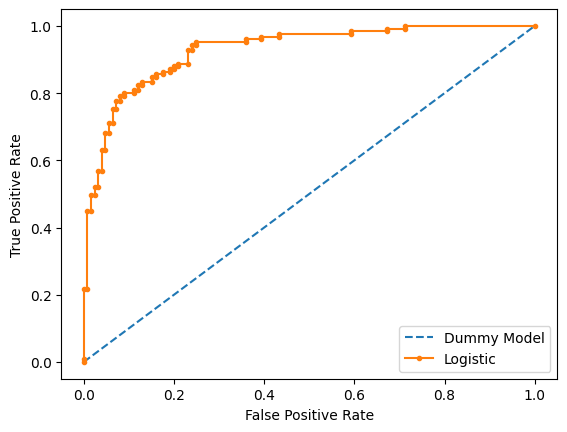

In [55]:
# plot the roc curve for the model
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

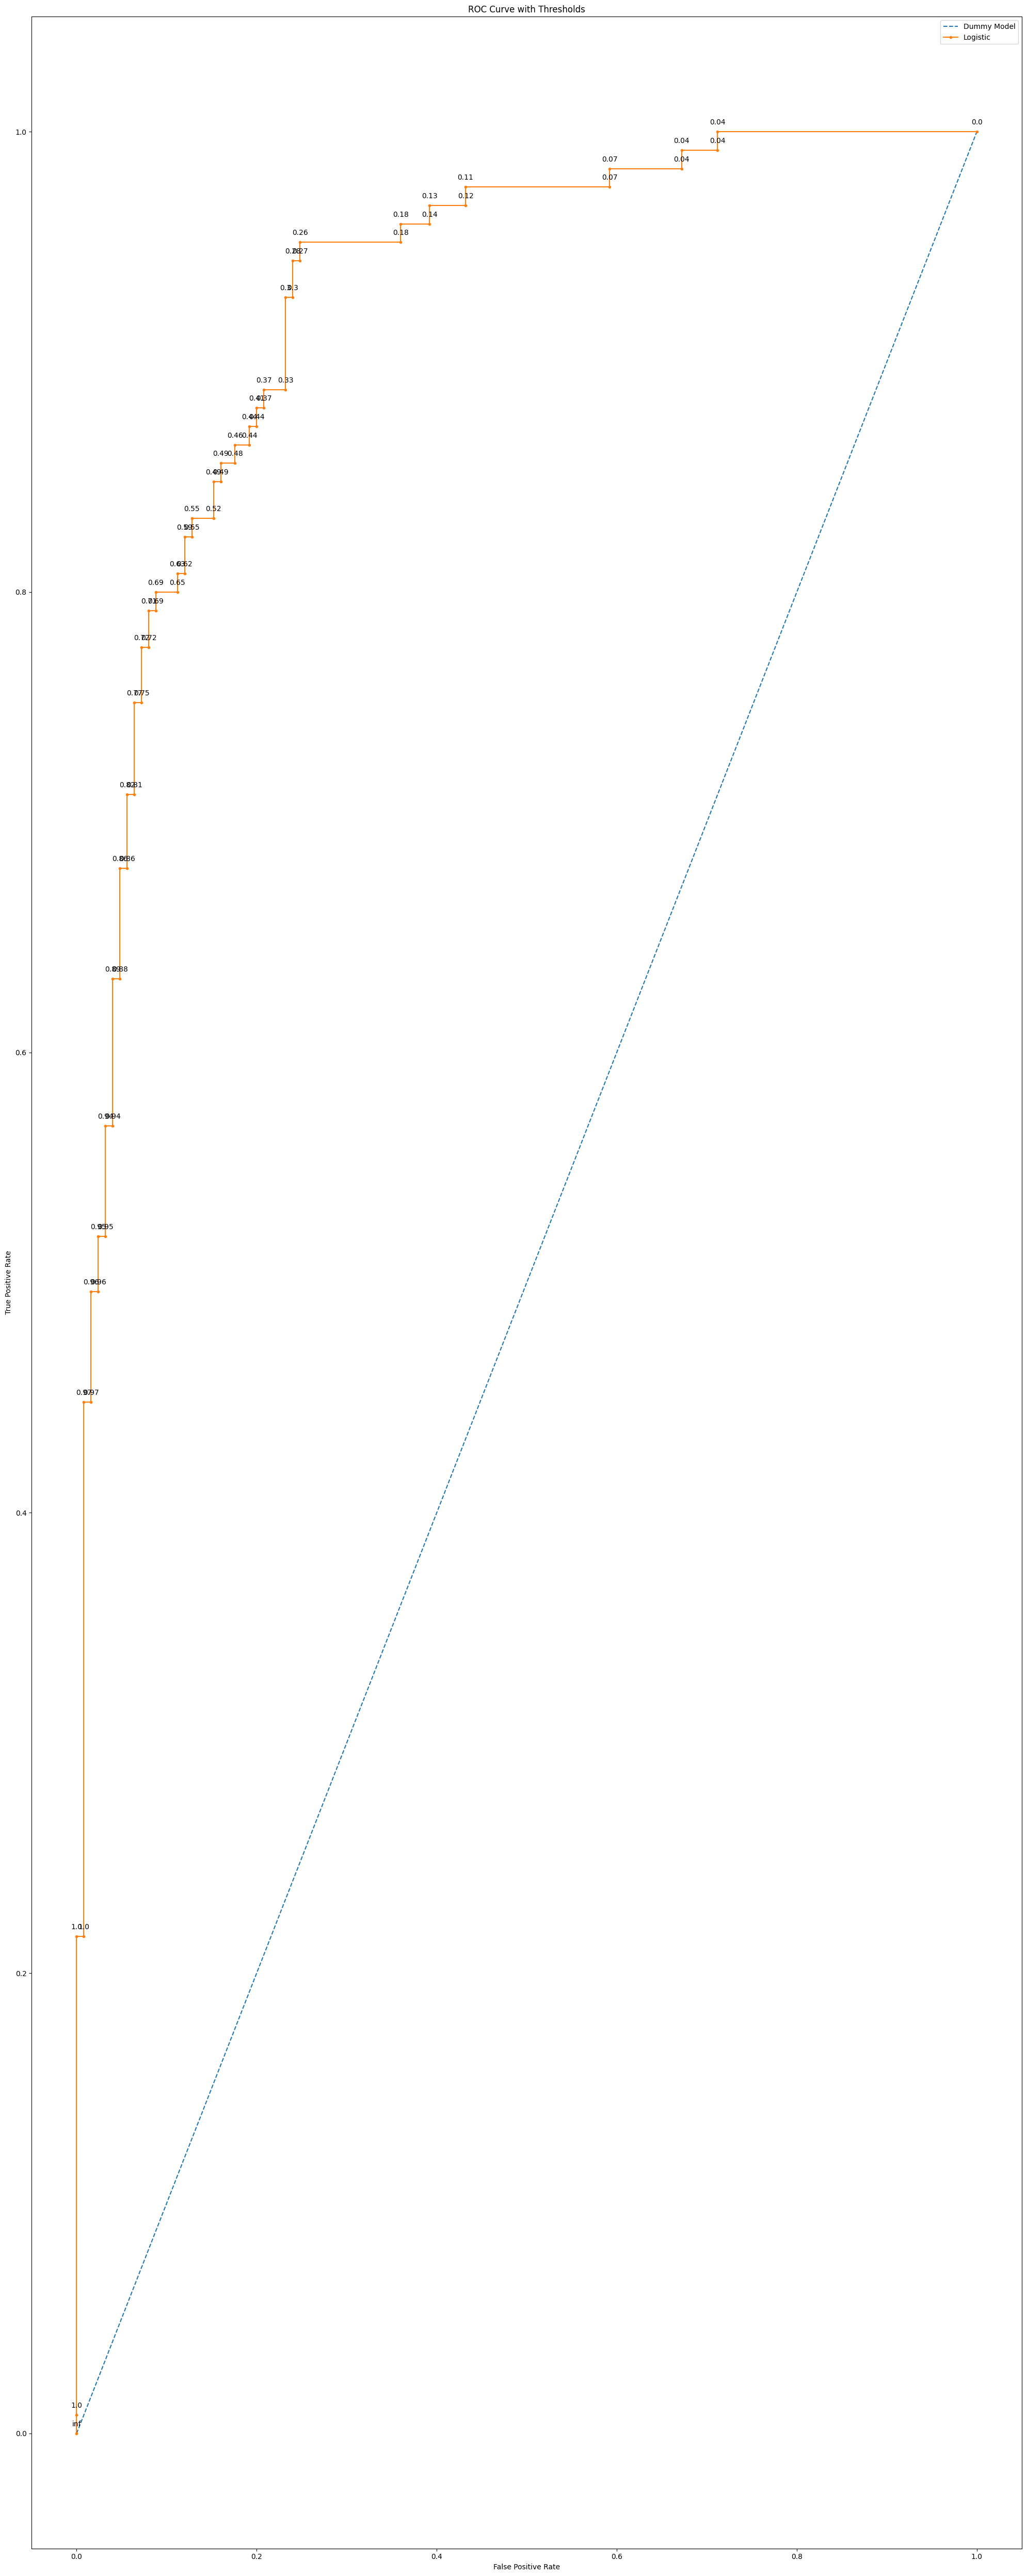

In [62]:
# Plot the ROC curve for the model
import numpy as np
import matplotlib.pyplot as plt

# Initialize a new figure for the plot
fig, ax = plt.subplots(figsize=(20, 50))

# Plot the dummy and logistic model ROC curves
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# Add annotations for the thresholds on the logistic model ROC curve
for fpr, tpr, thresh in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(thresh, 2)}', xy=(fpr, tpr), textcoords='offset points', xytext=(0, 10), ha='center')

# Set axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Thresholds')

# Show the legend
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
